pip install --user opencv-contrib-python

pip install opencv_python==3.4.2.16 
pip install opencv-contrib-python==3.4.2.16

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt


# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
octo_front = cv2.imread('./StereoOctopusLeft.jpg')
octo_offset = cv2.imread('./StereoOctopusRight.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

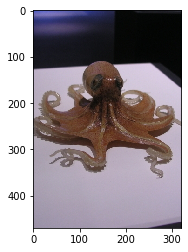

In [2]:
show_rgb_img(octo_front);

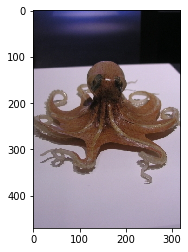

In [3]:
show_rgb_img(octo_offset);

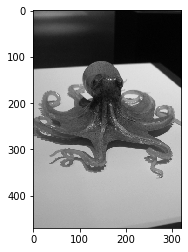

In [4]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

Here are what our SIFT features look like for the front-view octopus image:


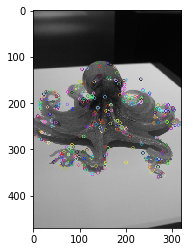

In [5]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

print ('Here are what our SIFT features look like for the front-view octopus image:')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

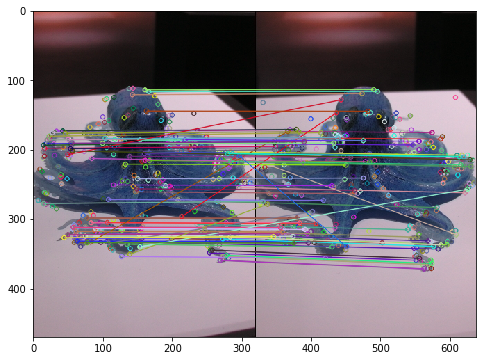

In [6]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

In [8]:
octo_front_desc[0]

array([ 28.,   0.,   0.,   0.,   0.,   0.,  26.,  41.,  45.,   2.,   0.,
         0.,   0.,   0.,  26.,  54., 148.,  27.,   0.,   0.,   0.,   0.,
        17.,  68., 111.,   8.,   0.,   0.,   0.,   1.,   0.,  11.,  35.,
         0.,   0.,   0.,   0.,   0.,  19.,  54., 129.,   2.,   0.,   0.,
         0.,   0.,  87., 148.,  94.,   0.,   0.,   0.,   0.,   0., 132.,
       148.,  45.,   0.,   0.,   1.,   1.,   0.,   2.,  40.,  54.,   4.,
         0.,   0.,   0.,   0.,  19.,  25., 148.,  41.,   0.,   0.,   0.,
         0.,  11.,  56., 101.,  11.,   0.,   0.,   0.,   1.,  26.,  43.,
         1.,   0.,   1.,   2.,   2.,   2.,   2.,   4.,  49.,   1.,   0.,
         0.,   0.,   7.,  96.,  80., 148.,   6.,   0.,   0.,   0.,   5.,
        77., 125.,  72.,   2.,   1.,   1.,   1.,   0.,   0.,  21.,   0.,
         0.,   1.,   1.,   2.,   0.,   0.,   0.], dtype=float32)

In [10]:
print (len(octo_front_kp)), 'keypoints in the list'
print (octo_front_kp[0])

334
<KeyPoint 000002525A21CA50>


In [11]:
def explain_keypoint(kp):
    print ('angle\n', kp.angle)
    print ('\nclass_id\n', kp.class_id)
    print ('\noctave (image scale where feature is strongest)\n', kp.octave)
    print ('\npt (x,y)\n', kp.pt)
    print ('\nresponse\n', kp.response)
    print ('\nsize\n', kp.size)

print ('this is an example of a single SIFT keypoint:\n* * *')
explain_keypoint(octo_front_kp[0])

this is an example of a single SIFT keypoint:
* * *
angle
 98.23312377929688

class_id
 -1

octave (image scale where feature is strongest)
 12780031

pt (x,y)
 (7.096283435821533, 273.2684631347656)

response
 0.02652777172625065

size
 2.1426312923431396


In [12]:
print ('SIFT descriptors are vectors of shape', octo_front_desc[0].shape)
print ('they look like this:')
octo_front_desc[0]

SIFT descriptors are vectors of shape (128,)
they look like this:


array([ 28.,   0.,   0.,   0.,   0.,   0.,  26.,  41.,  45.,   2.,   0.,
         0.,   0.,   0.,  26.,  54., 148.,  27.,   0.,   0.,   0.,   0.,
        17.,  68., 111.,   8.,   0.,   0.,   0.,   1.,   0.,  11.,  35.,
         0.,   0.,   0.,   0.,   0.,  19.,  54., 129.,   2.,   0.,   0.,
         0.,   0.,  87., 148.,  94.,   0.,   0.,   0.,   0.,   0., 132.,
       148.,  45.,   0.,   0.,   1.,   1.,   0.,   2.,  40.,  54.,   4.,
         0.,   0.,   0.,   0.,  19.,  25., 148.,  41.,   0.,   0.,   0.,
         0.,  11.,  56., 101.,  11.,   0.,   0.,   0.,   1.,  26.,  43.,
         1.,   0.,   1.,   2.,   2.,   2.,   2.,   4.,  49.,   1.,   0.,
         0.,   0.,   7.,  96.,  80., 148.,   6.,   0.,   0.,   0.,   5.,
        77., 125.,  72.,   2.,   1.,   1.,   1.,   0.,   0.,  21.,   0.,
         0.,   1.,   1.,   2.,   0.,   0.,   0.], dtype=float32)

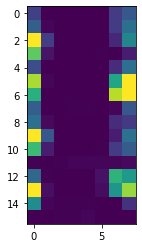

In [13]:
plt.imshow(octo_front_desc[0].reshape(16,8), interpolation='none');

In [15]:
strange_front = cv2.imread('./StereoAnemoneColonyLeft.jpg')
strange_offset = cv2.imread('./StereoAnemoneColonyRight.jpg')

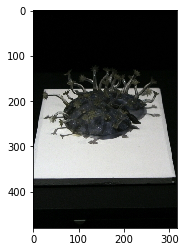

In [16]:
show_rgb_img(strange_front);

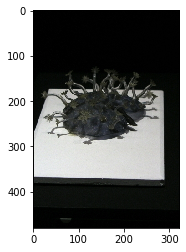

In [17]:
show_rgb_img(strange_offset);

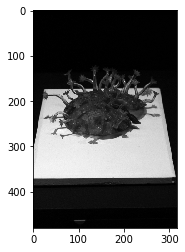

In [18]:
strange_front_gray = to_gray(strange_front)
strange_offset_gray = to_gray(strange_offset)

plt.imshow(strange_front_gray, cmap='gray');

Here are what our SIFT features look like for the front-view octopus image:


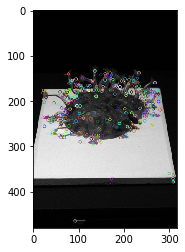

In [19]:
# generate SIFT keypoints and descriptors
strange_front_kp, strange_front_desc = gen_sift_features(strange_front_gray)
strange_offset_kp, strange_offset_desc = gen_sift_features(strange_offset_gray)

print ('Here are what our SIFT features look like for the front-view octopus image:')
show_sift_features(strange_front_gray, strange_front, strange_front_kp);

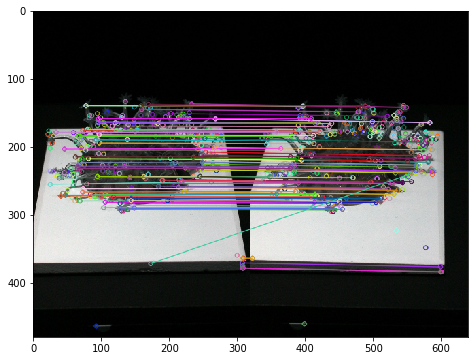

In [20]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(strange_front_desc, strange_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    strange_front, strange_front_kp,
    strange_offset, strange_offset_kp,
    matches[:N_MATCHES], strange_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

In [21]:
strange_front_desc[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  37.,   0.,   0.,
         0.,   0.,   0.,   1.,  29., 140.,  13.,   0.,   0.,   0.,   0.,
        38., 140.,  42.,  22.,   0.,   0.,   0.,   0., 140., 137.,   2.,
         0.,   0.,   0.,   0.,   0.,   1.,   6.,  94.,   4.,   0.,   0.,
         0.,   0.,   3.,  42., 140., 140.,   4.,   0.,   0.,   0.,   1.,
        54.,  70., 140.,   7.,   0.,   0.,   0.,  10.,  22.,  15.,   4.,
         0.,   0.,   0.,   0.,   1.,   9.,  87.,  26.,   0.,   0.,   0.,
         0.,   8., 111.,  89.,  38.,   2.,   2.,   3.,   4.,  15., 124.,
        45., 140.,   5.,   4.,   4.,   5.,   5.,   4.,   8.,   5.,   0.,
         0.,   0.,   0.,   0.,   1., 125.,  49.,   0.,   0.,   0.,   0.,
         0.,  21.,  98.,  38.,   6.,  15.,   6.,   5.,   7.,  24.,  30.,
        26.,   6.,  24.,  10.,   4.,   1.,  16.], dtype=float32)

In [22]:
print (len(strange_front_kp)), 'keypoints in the list'
print (strange_front_kp[0])

316
<KeyPoint 000002525A21C870>


In [23]:
print ('this is an example of a single SIFT keypoint:\n* * *')
explain_keypoint(strange_front_kp[0])

this is an example of a single SIFT keypoint:
* * *
angle
 0.67034912109375

class_id
 -1

octave (image scale where feature is strongest)
 5440511

pt (x,y)
 (21.397621154785156, 181.86610412597656)

response
 0.020954487845301628

size
 3.0726518630981445


In [24]:
print ('SIFT descriptors are vectors of shape', strange_front_desc[0].shape)
print ('they look like this:')
strange_front_desc[0]

SIFT descriptors are vectors of shape (128,)
they look like this:


array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  37.,   0.,   0.,
         0.,   0.,   0.,   1.,  29., 140.,  13.,   0.,   0.,   0.,   0.,
        38., 140.,  42.,  22.,   0.,   0.,   0.,   0., 140., 137.,   2.,
         0.,   0.,   0.,   0.,   0.,   1.,   6.,  94.,   4.,   0.,   0.,
         0.,   0.,   3.,  42., 140., 140.,   4.,   0.,   0.,   0.,   1.,
        54.,  70., 140.,   7.,   0.,   0.,   0.,  10.,  22.,  15.,   4.,
         0.,   0.,   0.,   0.,   1.,   9.,  87.,  26.,   0.,   0.,   0.,
         0.,   8., 111.,  89.,  38.,   2.,   2.,   3.,   4.,  15., 124.,
        45., 140.,   5.,   4.,   4.,   5.,   5.,   4.,   8.,   5.,   0.,
         0.,   0.,   0.,   0.,   1., 125.,  49.,   0.,   0.,   0.,   0.,
         0.,  21.,  98.,  38.,   6.,  15.,   6.,   5.,   7.,  24.,  30.,
        26.,   6.,  24.,  10.,   4.,   1.,  16.], dtype=float32)

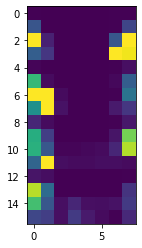

In [26]:
plt.imshow(strange_front_desc[0].reshape(16,8), interpolation='none');